In [1]:
import numpy as np
import json


with open('../_data/train.json', 'r') as f:
    train = json.load(f)
with open('../_data/test.json', 'r') as f:
    test = json.load(f)

In [2]:
len(train), len(test)

(39774, 9944)

In [3]:
train[0]

{'cuisine': 'greek',
 'id': 10259,
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

In [4]:
from collections import Counter

In [5]:
ingr_train = Counter()
cuisines_train = Counter()

ingr_test = Counter()

In [6]:
for recipe in train:
    ingr_train.update(recipe['ingredients'])
    cuisines_train.update([recipe['cuisine']])

for recipe in test:
    ingr_test.update(recipe['ingredients'])

In [7]:
len(ingr_train), len(ingr_test)

(6714, 4484)

In [8]:
non_overlap = [ingr for ingr in ingr_test.keys() if ingr not in ingr_train.keys()]
len(non_overlap)

423

In [9]:
ingr_test_uniques = dict((key, ingr_test[key]) for key in non_overlap)
sorted(ingr_test_uniques.items(), key=lambda x: x[1])[::-1]

[('indian bay leaf', 3),
 ('McCormick Chili Powder', 3),
 ("Uncle Ben's® Ready Rice® Original Long Grain", 3),
 ('konbu dashi', 3),
 ('whiting', 2),
 ('mild white fish', 2),
 ('ground pork fat', 2),
 ('american eggplant', 2),
 ('fresh gnocchi', 2),
 ('reduced fat reduced sodium swiss cheese', 2),
 ('sambhar powder', 2),
 ('bitter chocolate', 2),
 ('spring salad mix', 2),
 ('pastry for single crust pie', 2),
 ('new mexican chile', 2),
 ('Best Foods Mayonnaise Dressing with Extra Virgin Olive Oil', 2),
 ('blueberry jam', 2),
 ('zabaglione', 2),
 ('laughing cow', 2),
 ('rose extract', 2),
 ('Thai Kitchen Red Curry Paste', 2),
 ('chablis', 2),
 ('black sticky rice', 2),
 ('cubed pork', 2),
 ('KRAFT Classic Ranch Dressing', 2),
 ('Lipton® Cup Size Tea Bags', 2),
 ('chuck eye steak', 2),
 ('young ginger', 2),
 ('skinless boneless chicken legs', 2),
 ('herbal tea', 2),
 ('roast beef fat', 2),
 ('McCormick Garlic Powder', 2),
 ('herb mix', 2),
 ('alfredostyle pasta sauce', 2),
 ('no salt added

In [10]:
import re

In [11]:
[x for x in ingr_train.keys() if re.search(r'[^\w\s-]', x.lower())]

['1% low-fat milk',
 'english muffins, split and toasted',
 '2% reduced-fat milk',
 'green bell pepper, slice',
 'red kidnei beans, rins and drain',
 'whole kernel corn, drain',
 'water chestnuts, drained and chopped',
 'Bertolli® Classico Olive Oil',
 'bacon, crisp-cooked and crumbled',
 '(    oz.) tomato sauce',
 'half & half',
 'Old El Paso™ mild red enchilada sauce',
 'Pillsbury™ Refrigerated Crescent Dinner Rolls',
 'cream cheese, soften',
 'Sargento® Traditional Cut Shredded Mozzarella Cheese',
 'uncook medium shrimp, peel and devein',
 'sheep’s milk cheese',
 "Campbell's Condensed Tomato Soup",
 "Hellmann''s Light Mayonnaise",
 'roast red peppers, drain',
 "soft goat's cheese",
 'red bell pepper, sliced',
 '1% low-fat cottage cheese',
 "Campbell's Condensed Cream of Chicken Soup",
 'frozen mixed thawed vegetables,',
 'besan (flour)',
 'Country Crock® Spread',
 'boneless, skinless chicken breast',
 '(10 oz.) frozen chopped spinach, thawed and squeezed dry',
 'fettuccine, cook and

In [17]:
len(cuisines_train.keys()), sorted(cuisines_train.items(), key=lambda x: x[0])

(20,
 [('brazilian', 467),
  ('british', 804),
  ('cajun_creole', 1546),
  ('chinese', 2673),
  ('filipino', 755),
  ('french', 2646),
  ('greek', 1175),
  ('indian', 3003),
  ('irish', 667),
  ('italian', 7838),
  ('jamaican', 526),
  ('japanese', 1423),
  ('korean', 830),
  ('mexican', 6438),
  ('moroccan', 821),
  ('russian', 489),
  ('southern_us', 4320),
  ('spanish', 989),
  ('thai', 1539),
  ('vietnamese', 825)])

In [15]:
def check_str(train, str_, default_cuisines=None):
    filtered = Counter([recipe['cuisine'] for recipe in train
                        if any(ingr for ingr in recipe['ingredients'] if str_ in ingr)])
    for cuisine in default_cuisines:
        if cuisine not in filtered.keys():
            filtered[cuisine] = 0
    return filtered

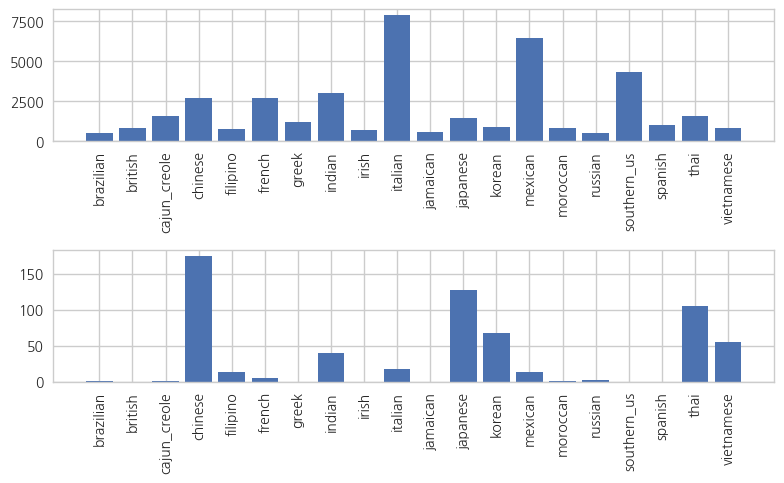

In [16]:
plt.subplot(211)
cuisines0 = sorted(Counter(recipe['cuisine'] for recipe in train).items(), key=lambda x: x[0])

plt.bar(range(len(cuisines0)), [x[1] for x in cuisines0], tick_label=[x[0] for x in cuisines0])
plt.xticks(rotation='vertical')


plt.subplot(212)
filtered_cuisines = check_str(train, str_='tofu', default_cuisines=[x[0] for x in cuisines0])
cuisines = sorted(filtered_cuisines.items(), key=lambda x: x[0])

plt.bar(range(len(cuisines)), [x[1] for x in cuisines], tick_label=[x[0] for x in cuisines])
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()


In [26]:
ingr_counts = dict(ingr_train)
sorted(ingr_counts.items(), key=lambda x: x[1], reverse=True)[:20]

[('salt', 18049),
 ('onions', 7972),
 ('olive oil', 7972),
 ('water', 7457),
 ('garlic', 7380),
 ('sugar', 6434),
 ('garlic cloves', 6237),
 ('butter', 4848),
 ('ground black pepper', 4785),
 ('all-purpose flour', 4632),
 ('pepper', 4438),
 ('vegetable oil', 4385),
 ('eggs', 3388),
 ('soy sauce', 3296),
 ('kosher salt', 3113),
 ('green onions', 3078),
 ('tomatoes', 3058),
 ('large eggs', 2948),
 ('carrots', 2814),
 ('unsalted butter', 2782)]

In [34]:
mpl.__version__

'2.1.0'

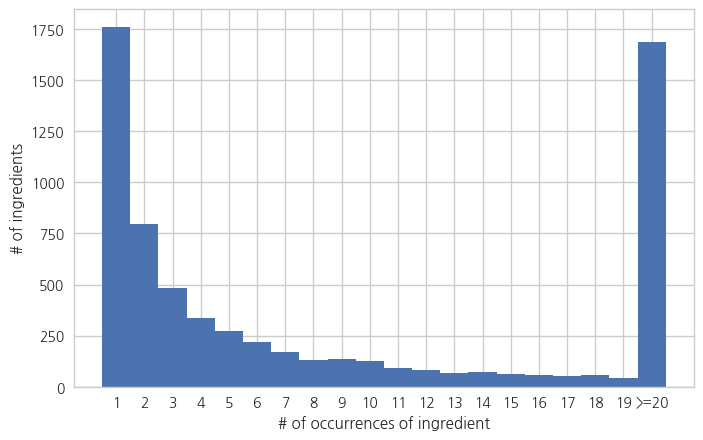

In [37]:
hist_max = 20

plt.hist(np.clip(list(ingr_counts.values()), 1, hist_max), bins=range(1, hist_max+2), align='left')
plt.xticks(range(1, hist_max+1), list(range(1, hist_max))+['>={}'.format(hist_max)])
plt.xlabel('# of occurrences of ingredient')
plt.ylabel('# of ingredients')
plt.show()

## Ingredient cleaning pipeline
* Lowercase all text
* Spell check/correct?
* Fat and sodium modifiers?
  * Nonfat, non-fat, non fat
  * Lowfat, low-fat, low fat
  * Fat free, fat-free
  * Less sodium, low sodium, lower sodium, reduced sodium